USE FOR REFERENCE.
https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/

Here we will Use (unautorized) library sklearn to see what kind of performance we should expect with a good implementation of logistic reg (using Ridge VS Lasso).

And then we can implement the best one (Ridge or Lasso)

In [1]:
import numpy as np
import pandas as pd
import math 
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


-Each Image is 1568 feature-long. 
-Each image contains 2 digits.
    - Representing a 56x28 pixel image 

-Each digit is a total of 784 pixel (i.e. 1568/2)
    - Representing a 28x28 pixel image 

    

In [2]:
train_inputs = np.genfromtxt('data/train.csv',  delimiter=',')
train_inputs = train_inputs[1:,:-1]

label_inputs = np.genfromtxt('data/train_result.csv',  delimiter=',')
label_inputs = label_inputs[1:,-1]

test_inputs = np.genfromtxt('data/test.csv',  delimiter=',')
test_inputs = test_inputs[1:,:-1]

In [3]:
# https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_inputs, 
                                                    label_inputs,
                                                   test_size=0.25,
                                                   random_state=0)

In [5]:
X_train.shape, X_test.shape

((37500, 1568), (12500, 1568))

FIRST I WILL TRY WITH RIDGE REGRESSION.

THEN WITH LASSO. AND I WILL IMPLEMENT THE BETTER ONE.



In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression 
                        solver='saga',
                        max_iter=5000, # was 10000
                        verbose=2, # output progress
                        n_jobs=6, # parallelize over 5 processes
                        C=50)
clf

LogisticRegression(C=50, max_iter=5000, n_jobs=6, solver='saga', verbose=2)

WARNING !!!! :
 
With parameters defined at (below), the clf.fit() took X mins

clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression 
                        solver='saga',
                        max_iter=5000, # was 10000
                        verbose=2, # output progress
                        n_jobs=6, # parallelize over 5 processes
                        C=50)


In [7]:
%%time
clf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


(1568,)


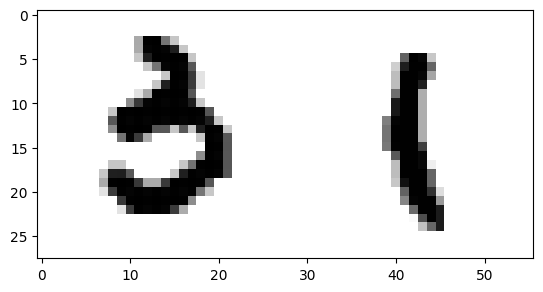

In [6]:
clf.classes_
clf.coef_.shape
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

Overview of label data. 
Labels go from 0 to 18 and we observe a bell-shaped (gaussian-like) distribution.

(50000,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


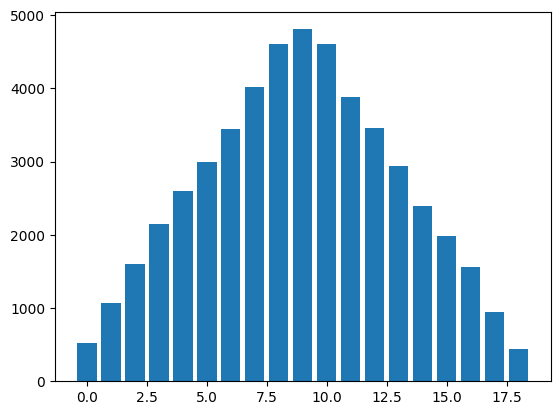

In [24]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification
clf.n_iter_[0] # num of iterations before tolerance was reached

In [47]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,56), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

Test code 

With learnRate = 0.1, numIteratitions=5 :
    error rate is 0.89134
    took 5 sec

With learnRate = 0.1, numIteratitions=200 :
    error rate is 0.79278
    took 2min40

With learnRate = 0.01, numIteratitions=500 :
    error rate is 0.84582
    took 6min40

With learnRate = 0.1, numIteratitions=1000 :
    error rate is 0.756
    took 14min

With learnRate = 0.05, numIteratitions=2000 :
    error rate is 0.756
    took min 30min

With learnRate = 1, numIteratitions=200 :
    error rate is 0.85
    took 2min30

With learnRate = 5, numIteratitions=500 :
    error rate is 0.85756
    took 8min30

With learnRate = 0.5, numIteratitions=200 (W is random):
    error rate is 0.84
    took 4min


With learnRate = 0.5, numIteratitions=1000
    error rate is 0.76872
    took 20min

With learnRate = 0.5, numIteratitions=2000
    error rate is 0.7462599999999999
    took 26min

With learnRate = 0.1, numIteratitions=5000
    error rate is 0.76848
    took 67min

In [48]:
# try predictions and compare 
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

iteration # 0 of 5000 ; (0.0%)
iteration # 50 of 5000 ; (1.0%)
iteration # 100 of 5000 ; (2.0%)
iteration # 150 of 5000 ; (3.0%)
iteration # 200 of 5000 ; (4.0%)
iteration # 250 of 5000 ; (5.0%)
iteration # 300 of 5000 ; (6.0%)
iteration # 350 of 5000 ; (7.0%)
iteration # 400 of 5000 ; (8.0%)
iteration # 450 of 5000 ; (9.0%)
iteration # 500 of 5000 ; (10.0%)
iteration # 550 of 5000 ; (11.0%)
iteration # 600 of 5000 ; (12.0%)
iteration # 650 of 5000 ; (13.0%)
iteration # 700 of 5000 ; (14.0%)
iteration # 750 of 5000 ; (15.0%)
iteration # 800 of 5000 ; (16.0%)
iteration # 850 of 5000 ; (17.0%)
iteration # 900 of 5000 ; (18.0%)
iteration # 950 of 5000 ; (19.0%)
iteration # 1000 of 5000 ; (20.0%)
iteration # 1050 of 5000 ; (21.0%)
iteration # 1100 of 5000 ; (22.0%)
iteration # 1150 of 5000 ; (23.0%)
iteration # 1200 of 5000 ; (24.0%)
iteration # 1250 of 5000 ; (25.0%)
iteration # 1300 of 5000 ; (26.0%)
iteration # 1350 of 5000 ; (27.0%)
iteration # 1400 of 5000 ; (28.0%)
iteration # 1450 o

In [49]:
clf.score(X_train, y_train) # training score
clf.score(X_test, y_test) # test score

error rate is 0.76848
Precision is 23.152%


(50000,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


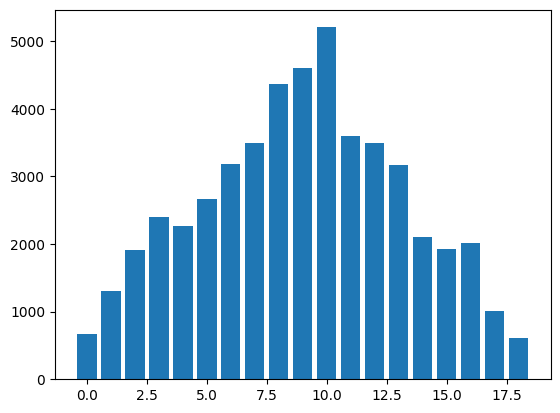

In [50]:
# Distribution of predictions (TERRIBLE ONE for reference with learnRate =5)
from collections import Counter
print(Y_pred_on_X_train.shape)
print(np.unique(Y_pred_on_X_train))
c = Counter(Y_pred_on_X_train)
plt.bar(c.keys(), c.values())
plt.show()

(50000,)
[ 0  1  2  3  5  6  8 10 11 14 17 18]


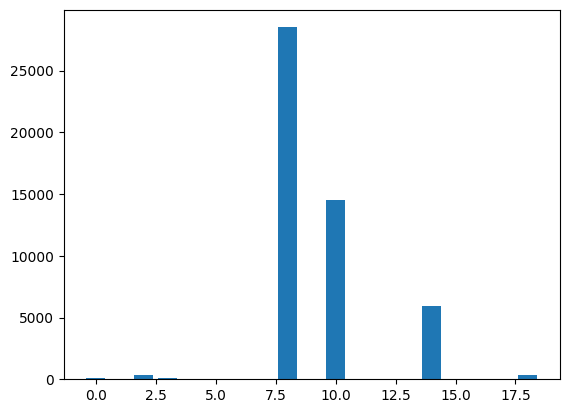

In [24]:
# Distribution of predictions (TERRIBLE ONE for reference with learnRate =5)
from collections import Counter
print(Y_pred_on_X_train.shape)
print(np.unique(Y_pred_on_X_train))
c = Counter(Y_pred_on_X_train)
plt.bar(c.keys(), c.values())
plt.show()

[ 7  6 11 ...  5  0  7]
(1568,)


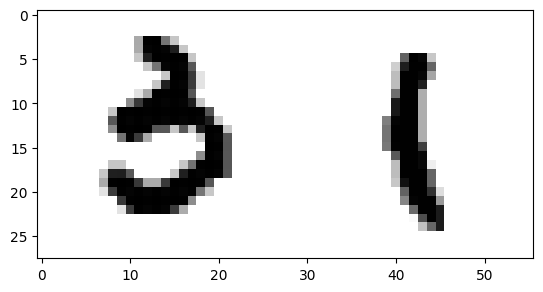

In [109]:
#manually verify some results 
print(Y_pred_on_X_train)
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()


In [29]:
np.random.rand(3,3)

array([[0.90813045, 0.42755629, 0.98341215],
       [0.89079484, 0.39934098, 0.56569419],
       [0.99906456, 0.57515802, 0.12419742]])